# Homework 2

## Exo 1

### b)

In [1]:
func_gen <- function(lambda,s) {
    return (exp(lambda*(s-1)))
}

extinct_prob <- function(lambda) {
    func_objectif <- function(s) {
    
        return( (s-func_gen(lambda,s))**2 )

    }

    return(optimize(func_objectif,c(0, 1),maximum = FALSE)$minimum)
}


extinct_prob_array <- function(lambdas) {
    
    e_lambdas <- array(0, dim=c(length(lambdas),1))

    for (i in 1:length(lambdas)) {
         e_lambdas[i,] <- extinct_prob(lambdas[i])
    }

    return(e_lambdas)
}

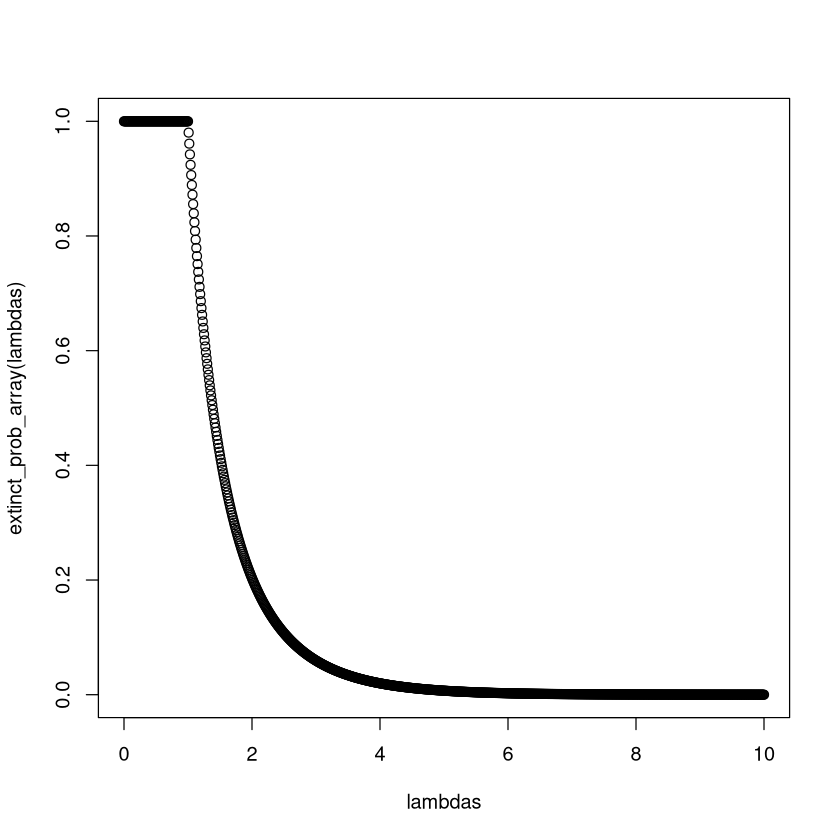

In [2]:
lambdas <- seq(0,10,0.01)
plot(lambdas,extinct_prob_array(lambdas))

In [3]:
extinct_prob(3)

[1] 0.05951888

### c)

In [4]:
extinct_prob_with_prior <- function(alpha,beta){
    
    func_to_integrate <- function(lambda) {
        
        return ( extinct_prob_array(lambda)*dgamma(lambda, alpha, beta))
    }
        
    max_int = 10
    
    return( integrate(func_to_integrate,0,max_int)$value)
}

In [5]:
extinct_prob_with_prior(15,9)

[1] 0.4002117

### d)

In [6]:
branch <- function(n,lambda) {
    z <- c(1,rep(0,n))
    
    for (i in 2:(n+1)) {
        
        z[i] <- sum(rpois(z[i-1],lambda))
        
    }
    return(z)
}

branch_array <- function(n,lambdas){
    
    branches <- array(0, dim=c(length(lambdas),n+1))
    for (i in 1:length(lambdas)) {
         branches[i,] <- branch(n,lambdas[i])
    }
    
    return (branches)
}

In [7]:
extinct_prop <- function(branches){
    s = 0
    for (i in 1:dim(branches)[1]) {
        if (tail(branches[i,],1) == 0) {
         s = s+1
        }
    }

    return (s/dim(branches)[1])
}

#### method 1) the distribution of lambda follow the prior knowledge infered by the data

In [8]:
alpha = 15
beta = 9

In [9]:
N = 1000

In [10]:
lambdas <- rgamma(N, alpha, beta)
branches = branch_array(15,lambdas)

In [11]:
extinct_prop(branches)

[1] 0.375

#### method 2) the distribution of lambda follow the prior knowledge $1/\lambda$ (no data)

In [12]:
#install.packages("distr")

In [13]:
suppressMessages(require(distr))

In [62]:
density_gamma00 <- function(x){

    if (x>0.1){
        return (1/(40000*x))
    }
    else{
        return (0)
    }
}

density_gamma00_array <- function(x){
    
    densities <- array(0, dim=c(length(x),1))
    for (i in 1:length(x)) {
         densities[i,] <- density_gamma00(x[i])
    }
    
    return (densities)
}

In [63]:
gamma00 <-AbscontDistribution(d=density_gamma00_array,withStand=TRUE)
rgamma00 <- r(gamma00)                             

In [64]:
lambdas2 <- rgamma00(10000)
max(lambdas2)

[1] 3.999389

In [84]:
N = 1000000

In [85]:
lambdas2 <- rgamma00(N)
lambdas <- rgamma(N, alpha, beta)

In [86]:
branches = branch_array(10,lambdas2)

In [87]:
branches_target <- branches[branches[,1]== 1 & branches[,2]== 1 & branches[,3]== 2 & branches[,4]== 5 &  branches[,5]==7,]

In [88]:
extinct_prop(branches_target)

[1] 0.02608696

In [97]:
length(branches_target)

[1] 2530

In [96]:
(1-0.4)**7

[1] 0.0279936

### e)

In [74]:
ml_lambda = 15/9

In [75]:
extinct_prob(ml_lambda)

[1] 0.3242577